In [68]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [70]:
data=pd.read_csv('Uber Drives - .csv' )
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [74]:
data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [76]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [80]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [81]:
data.shape

(1156, 7)

In [84]:
data=data.dropna()

In [86]:
data.shape

(653, 7)

In [88]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [90]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")

In [92]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [94]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [96]:
data['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

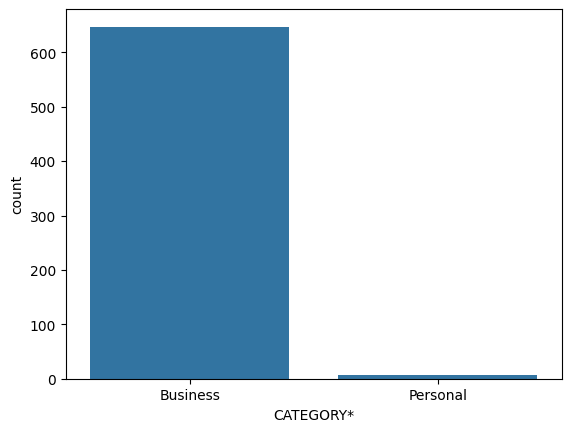

In [98]:
sns.countplot(x='CATEGORY*',data=data)

<Axes: ylabel='Frequency'>

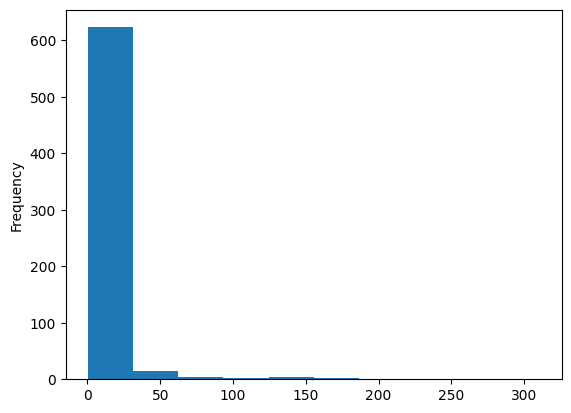

In [100]:
data['MILES*'].plot.hist()

Text(0.5, 1.0, 'Number of trips Vs hours')

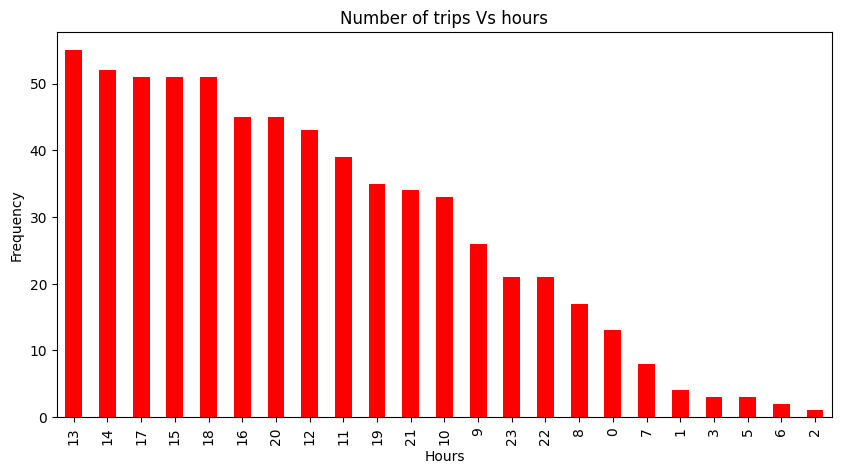

In [102]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

<Axes: xlabel='PURPOSE*'>

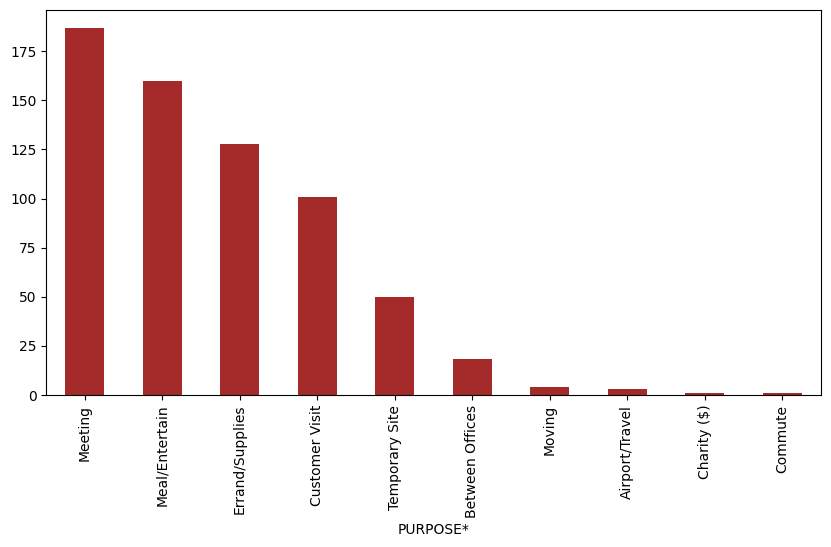

In [104]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

<Axes: xlabel='WEEKDAY'>

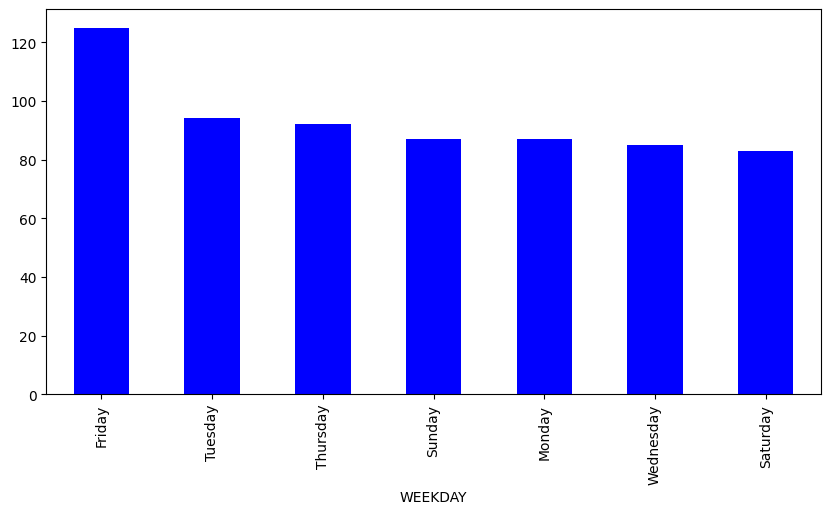

In [106]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

<Axes: xlabel='DAY'>

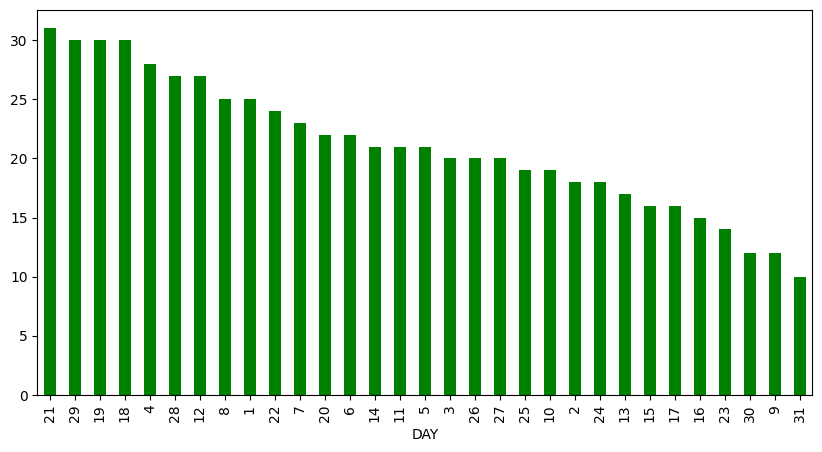

In [108]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

<Axes: xlabel='MONTH'>

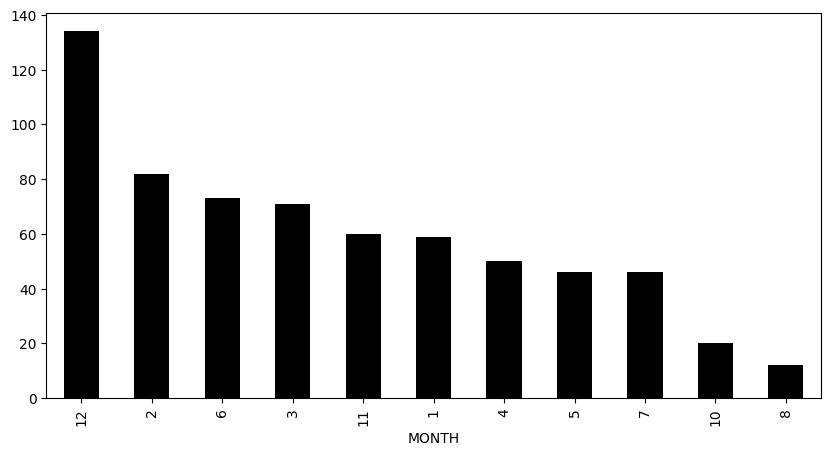

In [110]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

<Axes: xlabel='START*'>

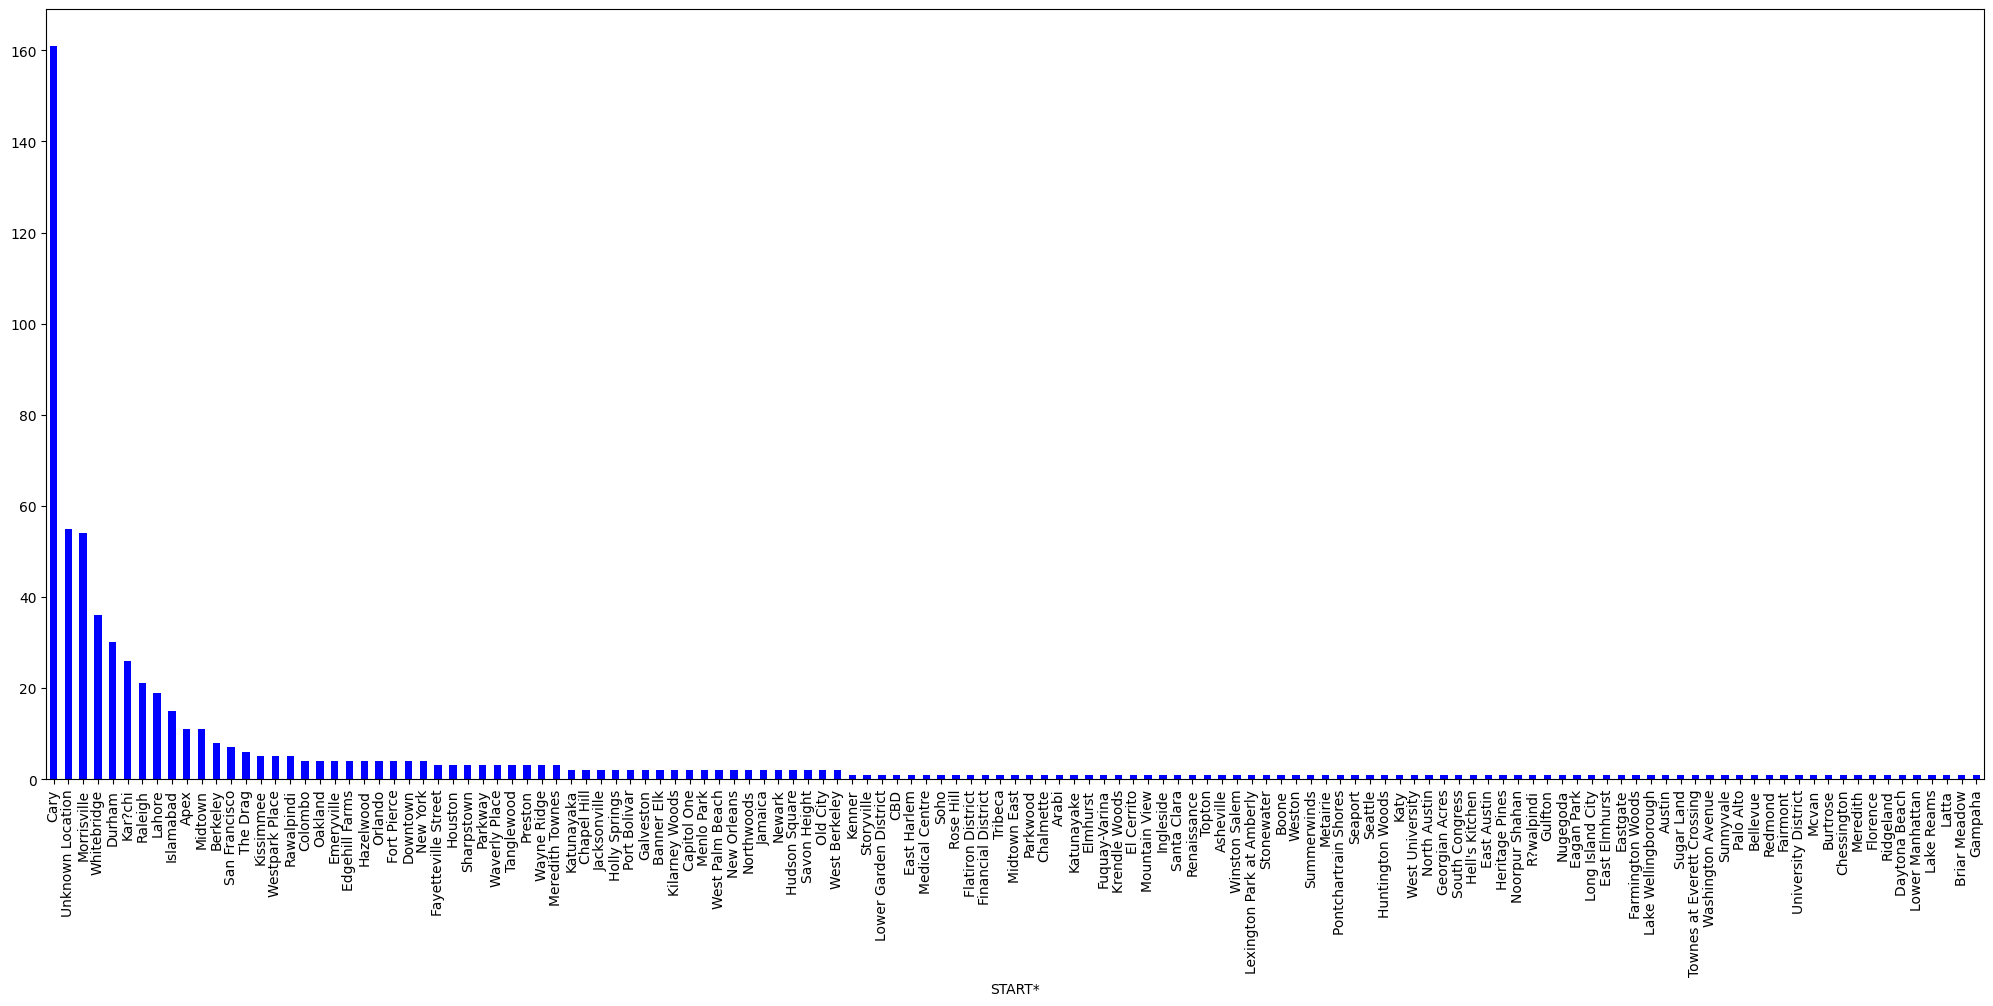

In [112]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

<Axes: xlabel='STOP*'>

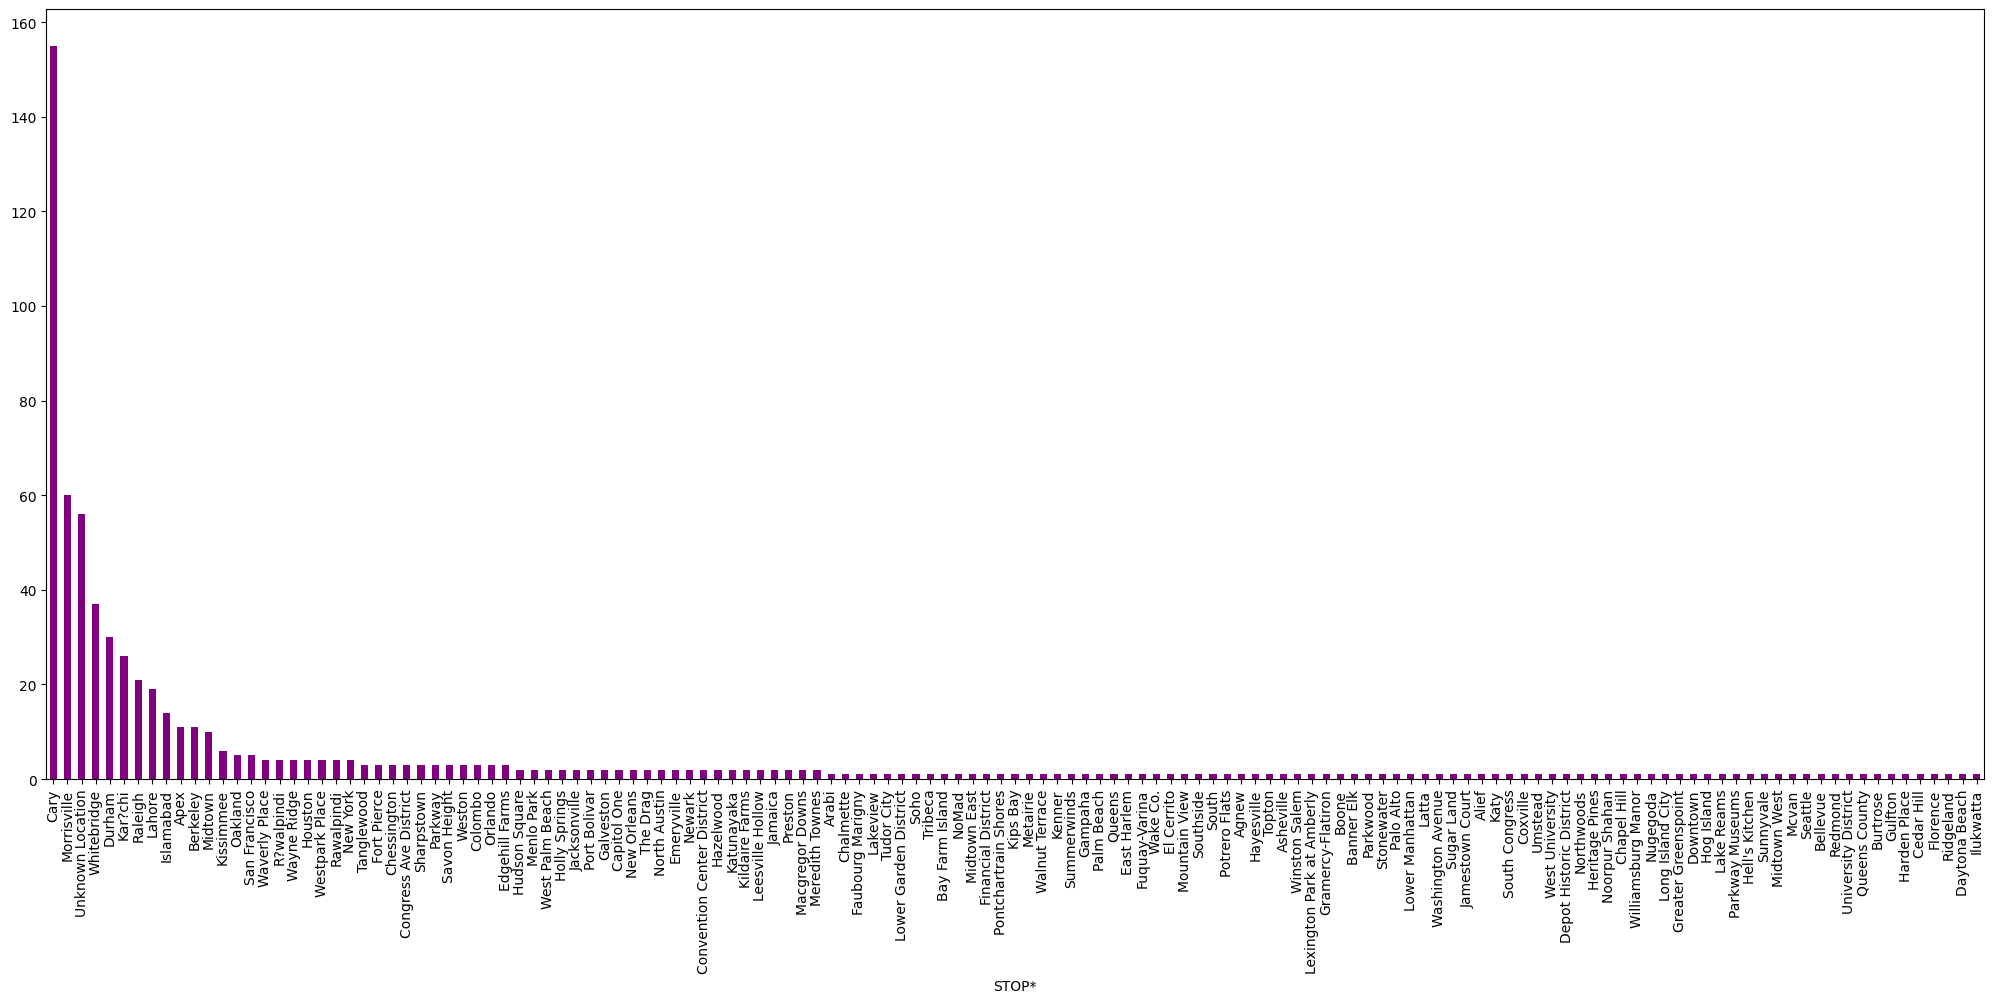

In [113]:
data['STOP*'].value_counts().plot(kind='bar',figsize=(25,10),color='purple')

<Axes: xlabel='MILES*'>

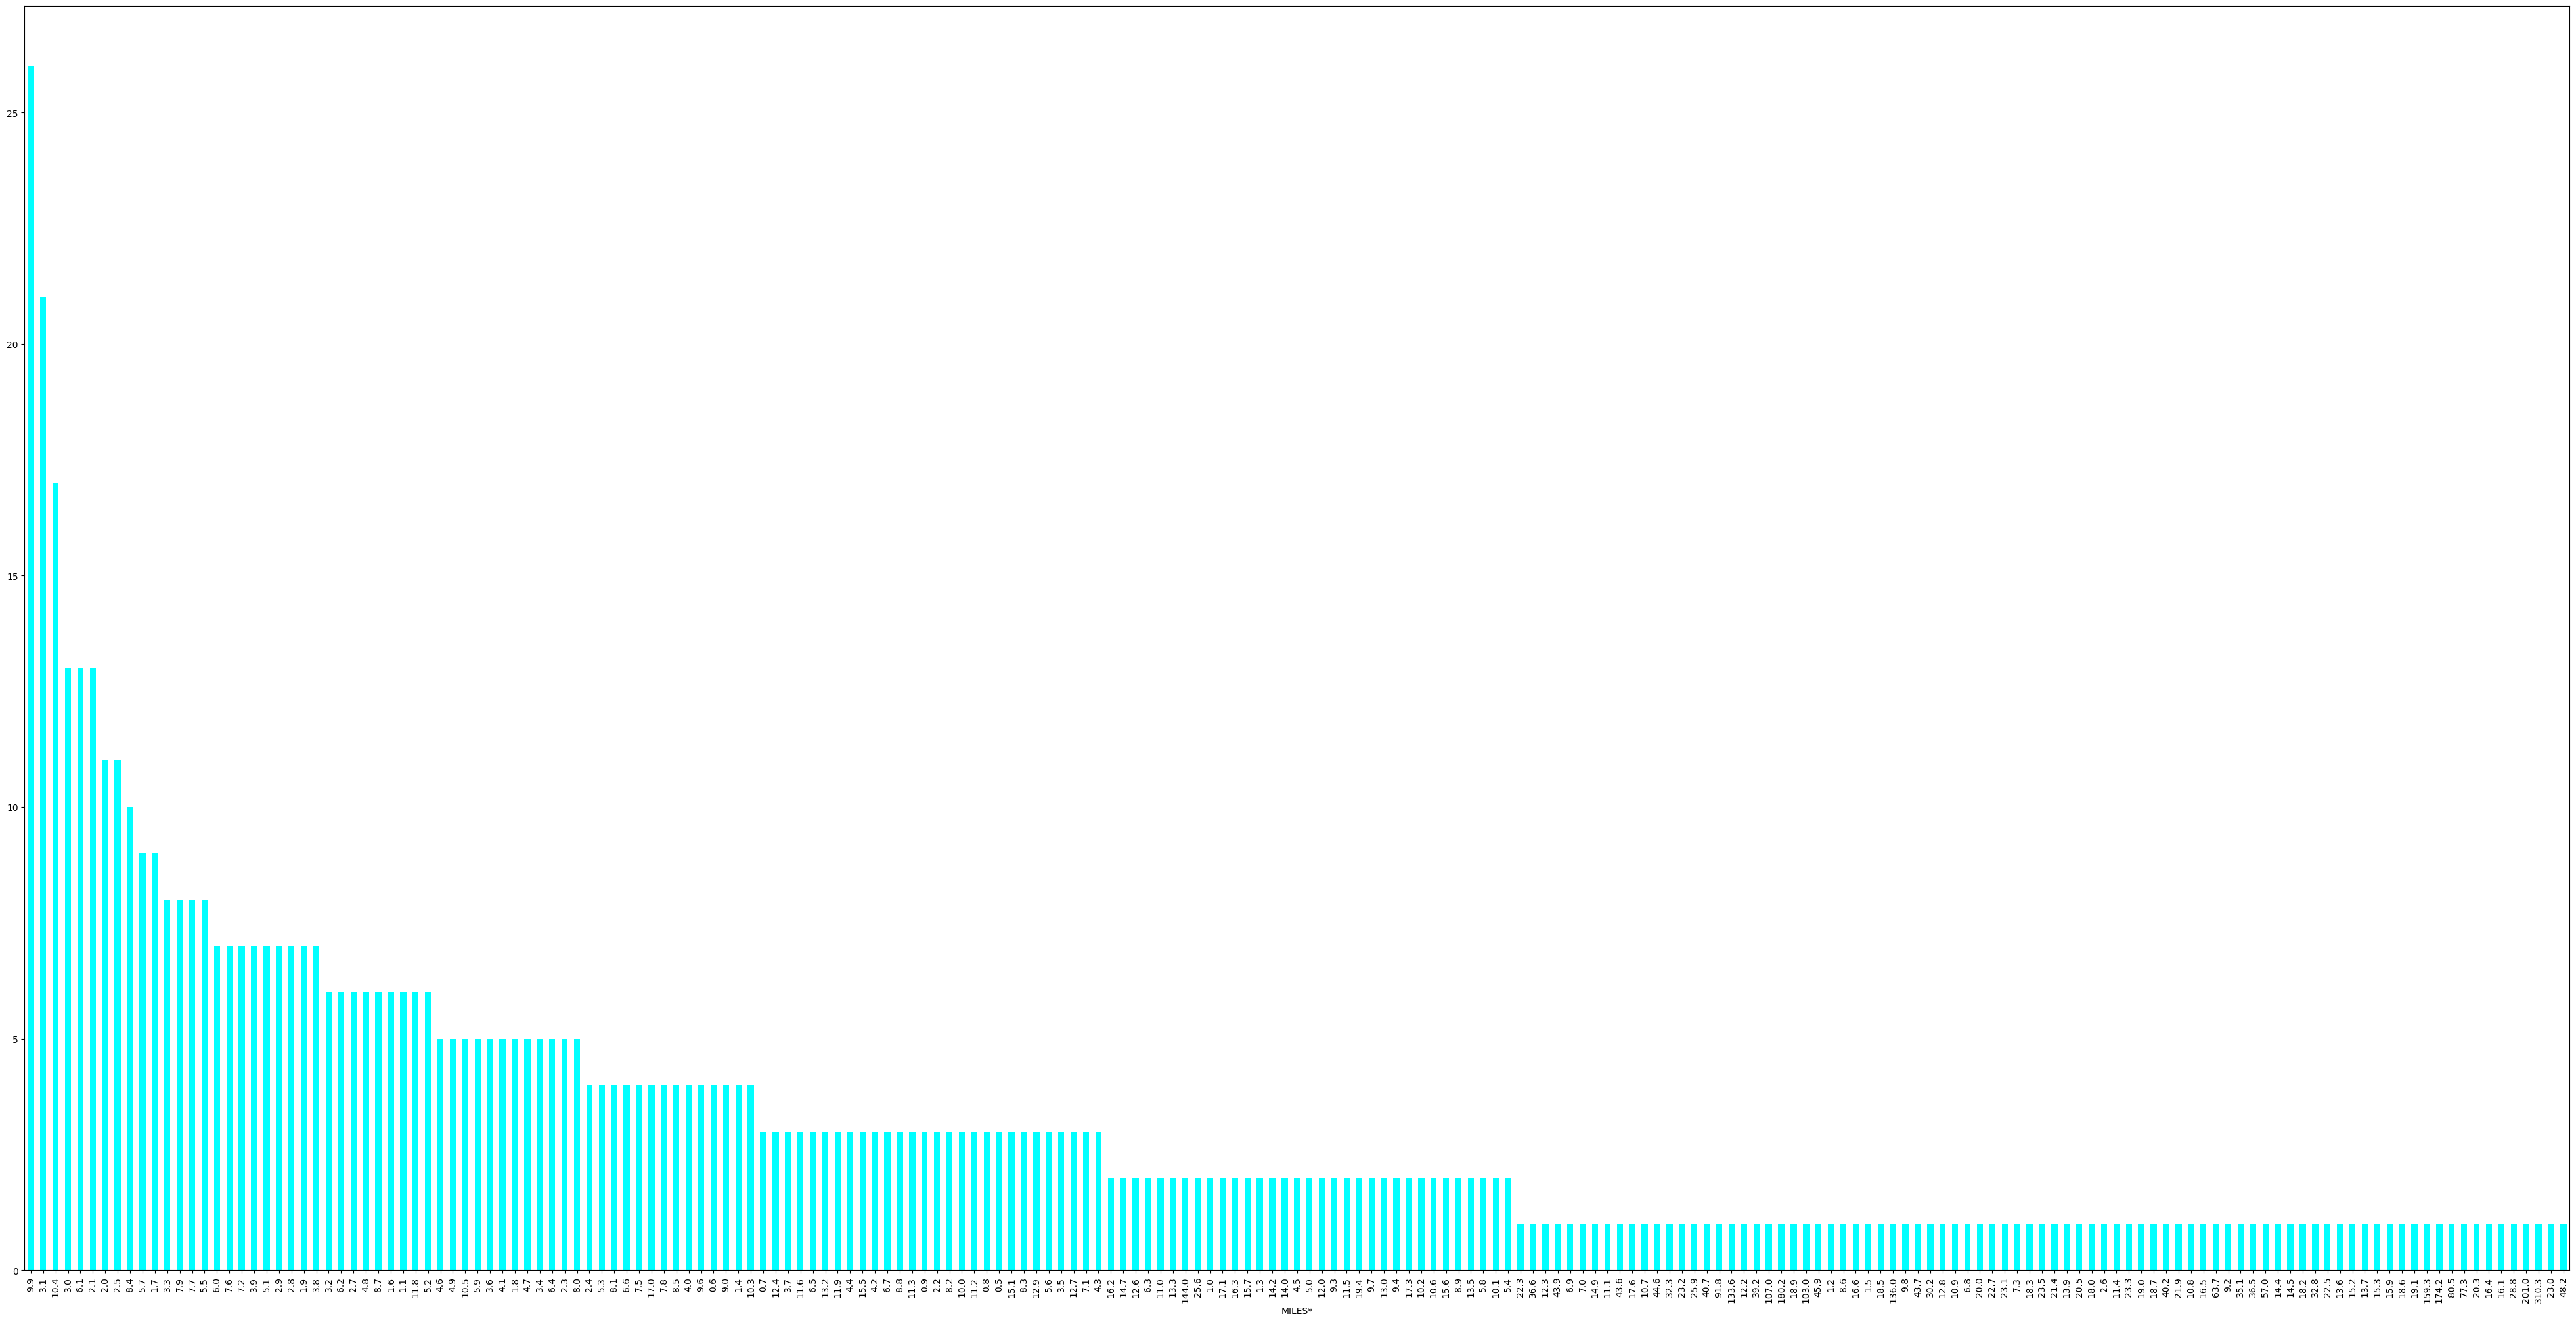

In [116]:
data['MILES*'].value_counts().plot(kind='bar',figsize=(50,25),color='cyan')

In [117]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [122]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = pd.read_csv("Uber Drives - .csv")

# Preprocessing
data = data.dropna()  # Drop missing values
X = data[['MILES*', 'HOUR', 'DAY', 'DAY_OF_WEEK', 'MONTH']]  # Features
y = data['PURPOSE*']  # Target variable

# Encoding categorical target
y = y.astype('category').cat.codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


KeyError: "['HOUR', 'DAY', 'DAY_OF_WEEK', 'MONTH'] not in index"

In [4]:
pip install pyspark

     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     --------------------------------------- 1.6/317.3 MB 10.5 MB/s eta 0:00:31
     --------------------------------------- 3.9/317.3 MB 10.7 MB/s eta 0:00:30
      -------------------------------------- 6.0/317.3 MB 10.8 MB/s eta 0:00:29
     - ------------------------------------- 8.4/317.3 MB 10.8 MB/s eta 0:00:29
     - ------------------------------------ 10.7/317.3 MB 10.8 MB/s eta 0:00:29
     - ------------------------------------ 12.8/317.3 MB 10.9 MB/s eta 0:00:28
     - ------------------------------------ 15.2/317.3 MB 10.9 MB/s eta 0:00:28
     -- ----------------------------------- 17.6/317.3 MB 11.0 MB/s eta 0:00:28
     -- ----------------------------------- 19.9/317.3 MB 11.0 MB/s eta 0:00:27
     -- ----------------------------------- 22.3/317.3 MB 11.1 MB/s eta 0:00:27
     -- ----------------------------------- 24.6/317.3 MB 11.1 MB/s eta 0:00:27
     --- ---------------------------------- 27.

In [88]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, sum, avg

# Initialize Spark session
spark = SparkSession.builder.appName("UberDrivesAnalysis").getOrCreate()




In [90]:
# Load the dataset
file_path = "Uber Drives - .csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)


In [92]:
# Show basic structure
df.printSchema()
df.show(5)


root
 |-- START_DATE*: string (nullable = true)
 |-- END_DATE*: string (nullable = true)
 |-- CATEGORY*: string (nullable = true)
 |-- START*: string (nullable = true)
 |-- STOP*: string (nullable = true)
 |-- MILES*: double (nullable = true)
 |-- PURPOSE*: string (nullable = true)

+--------------+--------------+---------+-----------+---------------+------+---------------+
|   START_DATE*|     END_DATE*|CATEGORY*|     START*|          STOP*|MILES*|       PURPOSE*|
+--------------+--------------+---------+-----------+---------------+------+---------------+
|1/1/2016 21:11|1/1/2016 21:17| Business|Fort Pierce|    Fort Pierce|   5.1| Meal/Entertain|
| 1/2/2016 1:25| 1/2/2016 1:37| Business|Fort Pierce|    Fort Pierce|   5.0|           NULL|
|1/2/2016 20:25|1/2/2016 20:38| Business|Fort Pierce|    Fort Pierce|   4.8|Errand/Supplies|
|1/5/2016 17:31|1/5/2016 17:45| Business|Fort Pierce|    Fort Pierce|   4.7|        Meeting|
|1/6/2016 14:42|1/6/2016 15:49| Business|Fort Pierce|West Palm Be

In [94]:

# Data cleaning (e.g., dropping nulls or unwanted columns)
df_cleaned = df.dropna()


In [96]:
# Example analysis
# 1. Total trips by purpose
trips_by_purpose = df_cleaned.groupBy("PURPOSE*").count().orderBy(col("count").desc())
trips_by_purpose.show()


+---------------+-----+
|       PURPOSE*|count|
+---------------+-----+
|        Meeting|  187|
| Meal/Entertain|  160|
|Errand/Supplies|  128|
| Customer Visit|  101|
| Temporary Site|   50|
|Between Offices|   18|
|         Moving|    4|
| Airport/Travel|    3|
|    Charity ($)|    1|
|        Commute|    1|
+---------------+-----+



In [97]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import hour, dayofmonth, dayofweek, month, date_format, to_timestamp

# Initialize Spark session
spark = SparkSession.builder.appName("UberDrivesAnalysis").getOrCreate()

# Load the dataset
file_path = "Uber Drives - .csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Convert START_DATE* to timestamp
df = df.withColumn("START_DATE*", to_timestamp("START_DATE*", "M/d/yyyy H:mm"))

# Extract components from START_DATE*
df_with_time = df.withColumn("HOUR", hour("START_DATE*")) \
                 .withColumn("DAY", dayofmonth("START_DATE*")) \
                 .withColumn("DAY_OF_WEEK", dayofweek("START_DATE*")) \
                 .withColumn("MONTH", month("START_DATE*")) \
                 .withColumn("WEEKDAY", date_format("START_DATE*", "EEEE"))  # Full weekday name

# Show the transformed DataFrame
df_with_time.show()



+-------------------+---------------+---------+-----------------+---------------+------+---------------+----+---+-----------+-----+---------+
|        START_DATE*|      END_DATE*|CATEGORY*|           START*|          STOP*|MILES*|       PURPOSE*|HOUR|DAY|DAY_OF_WEEK|MONTH|  WEEKDAY|
+-------------------+---------------+---------+-----------------+---------------+------+---------------+----+---+-----------+-----+---------+
|2016-01-01 21:11:00| 1/1/2016 21:17| Business|      Fort Pierce|    Fort Pierce|   5.1| Meal/Entertain|  21|  1|          6|    1|   Friday|
|2016-01-02 01:25:00|  1/2/2016 1:37| Business|      Fort Pierce|    Fort Pierce|   5.0|           NULL|   1|  2|          7|    1| Saturday|
|2016-01-02 20:25:00| 1/2/2016 20:38| Business|      Fort Pierce|    Fort Pierce|   4.8|Errand/Supplies|  20|  2|          7|    1| Saturday|
|2016-01-05 17:31:00| 1/5/2016 17:45| Business|      Fort Pierce|    Fort Pierce|   4.7|        Meeting|  17|  5|          3|    1|  Tuesday|
|2016-

In [100]:
df_cleaned = df_with_time.dropna()
df_cleaned.show()

+-------------------+---------------+---------+-----------------+---------------+------+---------------+----+---+-----------+-----+---------+
|        START_DATE*|      END_DATE*|CATEGORY*|           START*|          STOP*|MILES*|       PURPOSE*|HOUR|DAY|DAY_OF_WEEK|MONTH|  WEEKDAY|
+-------------------+---------------+---------+-----------------+---------------+------+---------------+----+---+-----------+-----+---------+
|2016-01-01 21:11:00| 1/1/2016 21:17| Business|      Fort Pierce|    Fort Pierce|   5.1| Meal/Entertain|  21|  1|          6|    1|   Friday|
|2016-01-02 20:25:00| 1/2/2016 20:38| Business|      Fort Pierce|    Fort Pierce|   4.8|Errand/Supplies|  20|  2|          7|    1| Saturday|
|2016-01-05 17:31:00| 1/5/2016 17:45| Business|      Fort Pierce|    Fort Pierce|   4.7|        Meeting|  17|  5|          3|    1|  Tuesday|
|2016-01-06 14:42:00| 1/6/2016 15:49| Business|      Fort Pierce|West Palm Beach|  63.7| Customer Visit|  14|  6|          4|    1|Wednesday|
|2016-

In [102]:
# 2. Total miles by day
total_miles_by_day =df_cleaned.groupBy("DAY").agg(sum("MILES*").alias("Total_Miles"))
total_miles_by_day.show()

+---+------------------+
|DAY|       Total_Miles|
+---+------------------+
| 31|146.40000000000003|
| 28| 572.2999999999998|
| 26|107.00000000000001|
| 27|             108.9|
| 12|172.20000000000002|
| 22|243.99999999999997|
|  1|             225.6|
| 13|126.40000000000002|
|  6|253.90000000000006|
| 16|              96.7|
|  3|             264.5|
| 20|             257.9|
|  5|             146.6|
| 19|330.09999999999985|
| 15|             142.3|
|  9|126.69999999999999|
| 17|             456.8|
|  4|201.90000000000006|
|  8|             164.4|
| 23|              79.3|
+---+------------------+
only showing top 20 rows



In [104]:

# 3. Most common start locations
common_start = df_cleaned.groupBy("START*").count().orderBy(col("count").desc())
common_start.show(10)

+----------------+-----+
|          START*|count|
+----------------+-----+
|            Cary|  161|
|Unknown Location|   55|
|     Morrisville|   54|
|     Whitebridge|   36|
|          Durham|   30|
|         Kar?chi|   26|
|         Raleigh|   21|
|          Lahore|   19|
|       Islamabad|   15|
|            Apex|   11|
+----------------+-----+
only showing top 10 rows



In [106]:
# 4. Miles driven per weekday
miles_by_weekday = df_cleaned.groupBy("WEEKDAY").agg(sum("MILES*").alias("Total_Miles"))
miles_by_weekday.show()


+---------+------------------+
|  WEEKDAY|       Total_Miles|
+---------+------------------+
|Wednesday|             810.4|
|  Tuesday| 648.3999999999999|
|   Friday|2078.0000000000005|
| Thursday| 936.9999999999997|
| Saturday|1213.6999999999998|
|   Monday| 667.5000000000002|
|   Sunday| 956.2000000000002|
+---------+------------------+



In [84]:

# Stop Spark session
#spark.stop()

In [110]:
from pyspark.sql.functions import sum

# Total miles by month
total_miles_by_month = df_cleaned.groupBy("MONTH").agg(sum("MILES*").alias("Total_Miles"))
total_miles_by_month.orderBy("MONTH").show()


+-----+------------------+
|MONTH|       Total_Miles|
+-----+------------------+
|    1|500.69999999999993|
|    2|             727.2|
|    3|1455.8999999999999|
|    4|            1094.9|
|    5|358.50000000000006|
|    6|             541.0|
|    7|488.29999999999995|
|    8|              88.1|
|   10|             496.8|
|   11| 635.4000000000001|
|   12|             924.4|
+-----+------------------+



In [112]:
from pyspark.sql.functions import count

# Most common start locations
common_start_locations = df_cleaned.groupBy("START*").agg(count("*").alias("Trip_Count"))
common_start_locations.orderBy("Trip_Count", ascending=False).show(10)

# Most common stop locations
common_stop_locations = df_cleaned.groupBy("STOP*").agg(count("*").alias("Trip_Count"))
common_stop_locations.orderBy("Trip_Count", ascending=False).show(10)


+----------------+----------+
|          START*|Trip_Count|
+----------------+----------+
|            Cary|       161|
|Unknown Location|        55|
|     Morrisville|        54|
|     Whitebridge|        36|
|          Durham|        30|
|         Kar?chi|        26|
|         Raleigh|        21|
|          Lahore|        19|
|       Islamabad|        15|
|            Apex|        11|
+----------------+----------+
only showing top 10 rows

+----------------+----------+
|           STOP*|Trip_Count|
+----------------+----------+
|            Cary|       155|
|     Morrisville|        60|
|Unknown Location|        56|
|     Whitebridge|        37|
|          Durham|        30|
|         Kar?chi|        26|
|         Raleigh|        21|
|          Lahore|        19|
|       Islamabad|        14|
|            Apex|        11|
+----------------+----------+
only showing top 10 rows



In [114]:
miles_by_weekday = df_cleaned.groupBy("WEEKDAY").agg(sum("MILES*").alias("Total_Miles"))
miles_by_weekday.orderBy("WEEKDAY").show()


+---------+------------------+
|  WEEKDAY|       Total_Miles|
+---------+------------------+
|   Friday|2078.0000000000005|
|   Monday| 667.5000000000002|
| Saturday|1213.6999999999998|
|   Sunday| 956.2000000000002|
| Thursday| 936.9999999999997|
|  Tuesday| 648.3999999999999|
|Wednesday|             810.4|
+---------+------------------+



In [116]:
purpose_distribution = df_cleaned.groupBy("PURPOSE*").agg(count("*").alias("Trip_Count"))
purpose_distribution.orderBy("Trip_Count", ascending=False).show()


+---------------+----------+
|       PURPOSE*|Trip_Count|
+---------------+----------+
|        Meeting|       187|
| Meal/Entertain|       160|
|Errand/Supplies|       128|
| Customer Visit|       101|
| Temporary Site|        50|
|Between Offices|        18|
|         Moving|         4|
| Airport/Travel|         3|
|    Charity ($)|         1|
|        Commute|         1|
+---------------+----------+



In [118]:
from pyspark.sql.functions import avg

# Average miles per trip by purpose
avg_miles_by_purpose = df_cleaned.groupBy("PURPOSE*").agg(avg("MILES*").alias("Average_Miles"))
avg_miles_by_purpose.orderBy("Average_Miles", ascending=False).show()


+---------------+------------------+
|       PURPOSE*|     Average_Miles|
+---------------+------------------+
|        Commute|             180.2|
| Customer Visit|20.688118811881193|
|        Meeting|15.247593582887706|
|    Charity ($)|              15.1|
|Between Offices|10.944444444444446|
| Temporary Site|10.473999999999997|
| Meal/Entertain|          5.698125|
| Airport/Travel|               5.5|
|         Moving|              4.55|
|Errand/Supplies|3.9687500000000004|
+---------------+------------------+



In [120]:
trips_by_hour = df_cleaned.groupBy("HOUR").agg(count("*").alias("Trip_Count"))
trips_by_hour.orderBy("HOUR").show()


+----+----------+
|HOUR|Trip_Count|
+----+----------+
|   0|        13|
|   1|         4|
|   2|         1|
|   3|         3|
|   5|         3|
|   6|         2|
|   7|         8|
|   8|        17|
|   9|        26|
|  10|        33|
|  11|        39|
|  12|        43|
|  13|        55|
|  14|        52|
|  15|        51|
|  16|        45|
|  17|        51|
|  18|        51|
|  19|        35|
|  20|        45|
+----+----------+
only showing top 20 rows



In [126]:
from pyspark.sql.functions import max, min

# Longest trip
longest_trip = df_cleaned.orderBy("MILES*", ascending=False).select("START*", "STOP*", "MILES*").first()
print(f"Longest Trip: {longest_trip}")

# Ensure special characters are handled correctly by using backticks
shortest_trip = df_cleaned.filter("`MILES*` > 0").orderBy("`MILES*`").select("START*", "STOP*", "MILES*").first()
print(f"Shortest Trip: {shortest_trip}")


Longest Trip: Row(START*='Latta', STOP*='Jacksonville', MILES*=310.3)
Shortest Trip: Row(START*='Cary', STOP*='Cary', MILES*=0.5)


In [128]:
trips_by_category = df_cleaned.groupBy("CATEGORY*").agg(count("*").alias("Trip_Count"))
trips_by_category.orderBy("Trip_Count", ascending=False).show()


+---------+----------+
|CATEGORY*|Trip_Count|
+---------+----------+
| Business|       647|
| Personal|         6|
+---------+----------+



In [130]:
from pyspark.sql.functions import corr

# Correlation between HOUR and MILES*
correlation = df_cleaned.select(corr("HOUR", "MILES*").alias("Correlation")).first()
print(f"Correlation between hour of the day and miles: {correlation['Correlation']}")


Correlation between hour of the day and miles: -0.004370237815735643


In [132]:
heatmap = df_cleaned.groupBy("HOUR", "WEEKDAY").agg(count("*").alias("Trip_Count"))
heatmap.orderBy("HOUR", "WEEKDAY").show()


+----+---------+----------+
|HOUR|  WEEKDAY|Trip_Count|
+----+---------+----------+
|   0|   Friday|         2|
|   0|   Monday|         1|
|   0| Saturday|         1|
|   0|   Sunday|         3|
|   0| Thursday|         1|
|   0|  Tuesday|         3|
|   0|Wednesday|         2|
|   1| Saturday|         1|
|   1|   Sunday|         1|
|   1|  Tuesday|         1|
|   1|Wednesday|         1|
|   2|   Sunday|         1|
|   3|   Sunday|         1|
|   3| Thursday|         1|
|   3|  Tuesday|         1|
|   5|   Friday|         1|
|   5|   Monday|         1|
|   5|   Sunday|         1|
|   6|   Monday|         1|
|   6|  Tuesday|         1|
+----+---------+----------+
only showing top 20 rows

